In [1]:
import SIFT_KeyPoint, SIFT_Params, SIFT_Visualization, SIFT_algo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from scipy.ndimage import generic_filter

In [2]:
def generate_gaussian_filter(size=3, sigma=3):
    gaussian_filter = np.zeros((size, size))
    n = size//2
    #sigma = n

    # generating the filter
    for y in range(-n, n+1):
        for x in range(-n, n+1):
            normal = 1 / (2.0 * np.pi * sigma**2.0)
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            gaussian_filter[y+n, x+n] = normal * exp_term
    return gaussian_filter / gaussian_filter.sum()

def scale(img, s):
    return cv.resize(img, tuple(
        map(lambda x: int(x//s**-1), img.shape)), fx=1, fy=1)

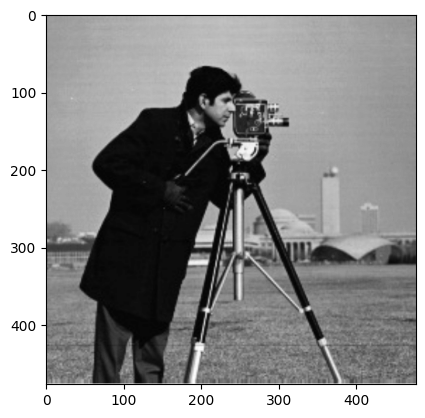

In [3]:
img = plt.imread("../image.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

sa = SIFT_algo.SIFT_Algorithm
sa_params = SIFT_Params.SIFT_Params()

scalespace, deltas, sigmas = sa.create_scale_space(img_gray, sa_params)
#SIFT_Visualization.visualize_scale_space(scalespace[0], "scalespace")

s=1.0 i=1


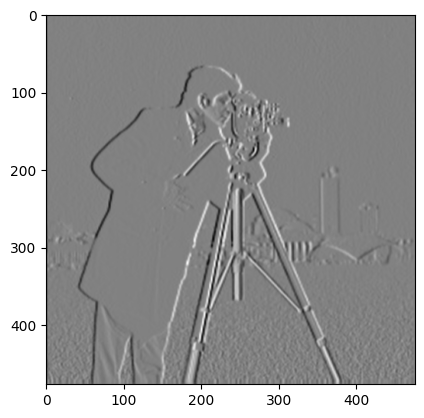

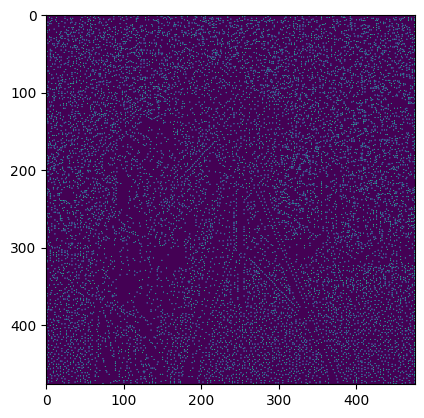

s=1.0 i=2


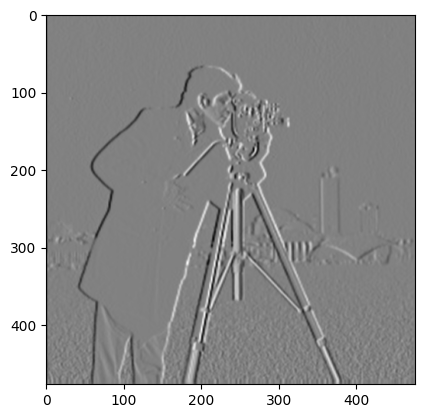

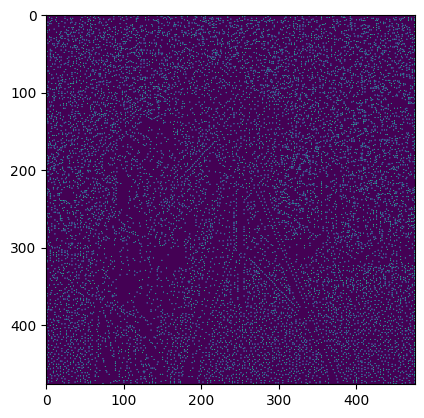

s=1.0 i=3


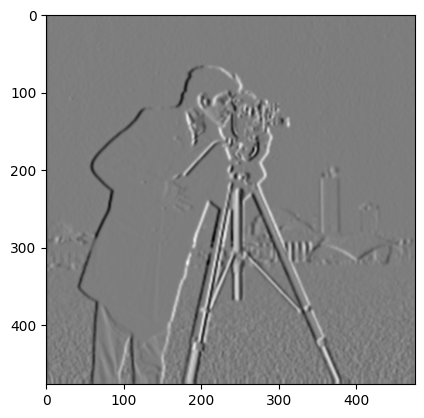

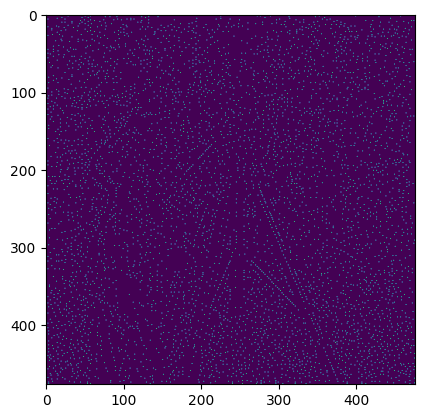

s=0.5 i=1


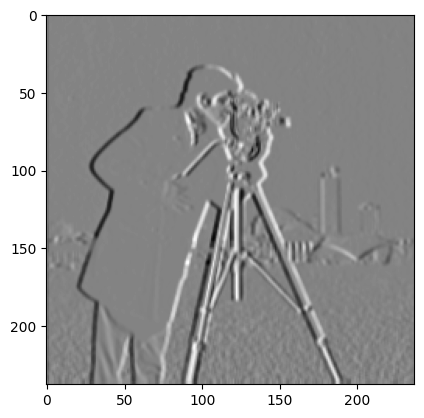

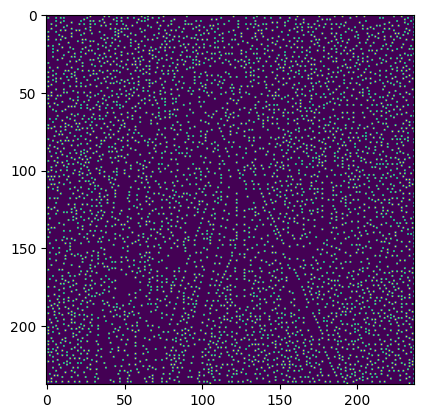

s=0.5 i=2


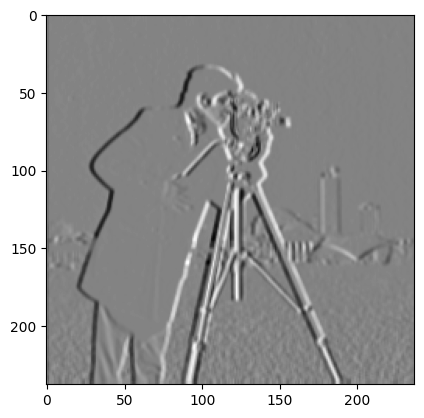

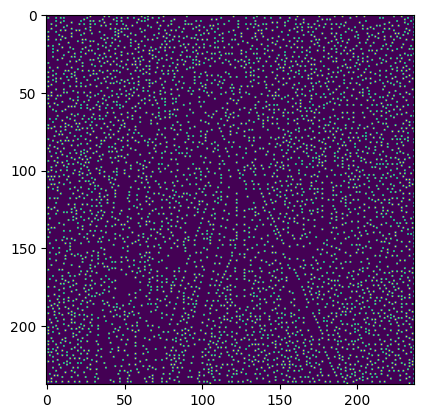

s=0.5 i=3


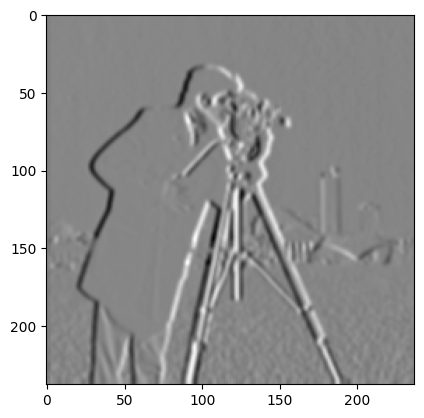

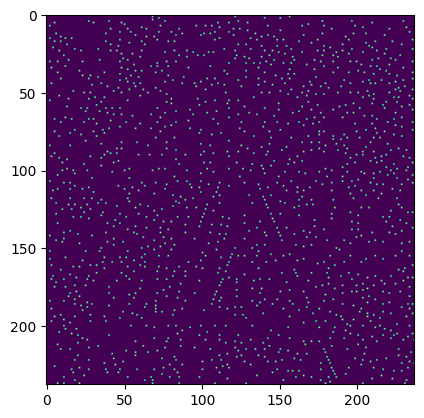

s=0.25 i=1


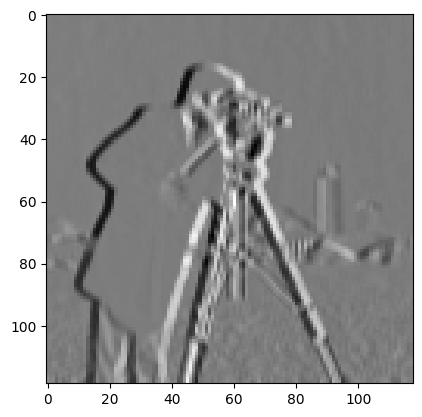

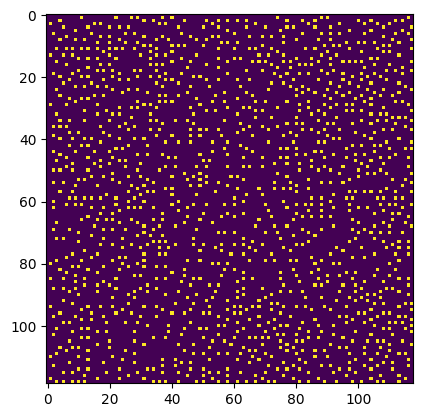

s=0.25 i=2


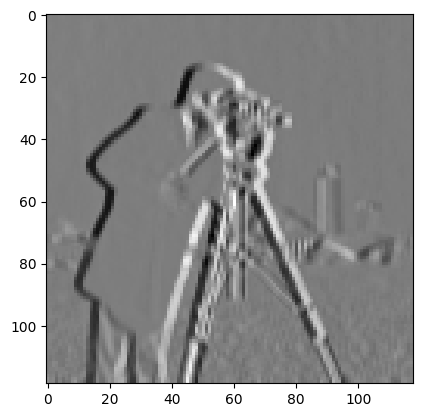

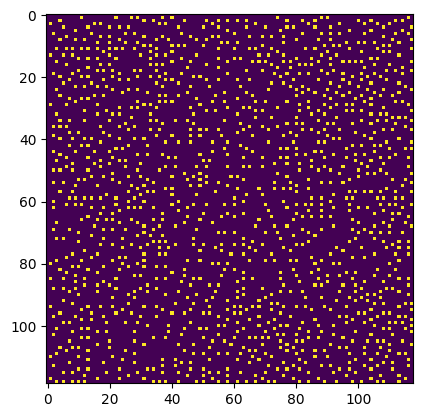

s=0.25 i=3


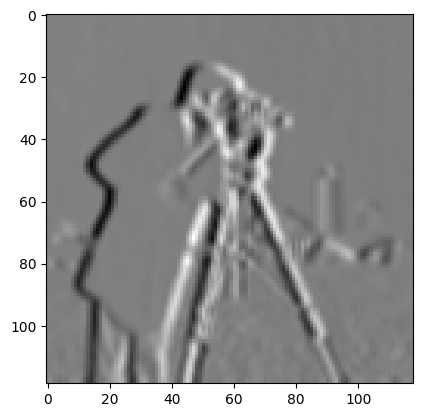

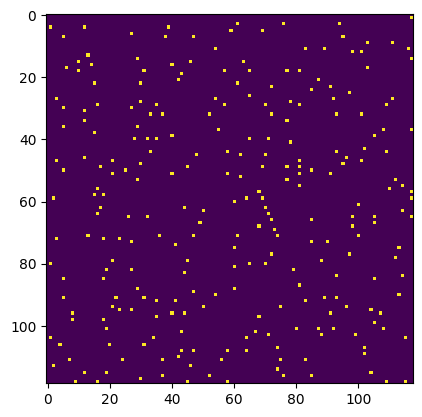

s=0.125 i=1


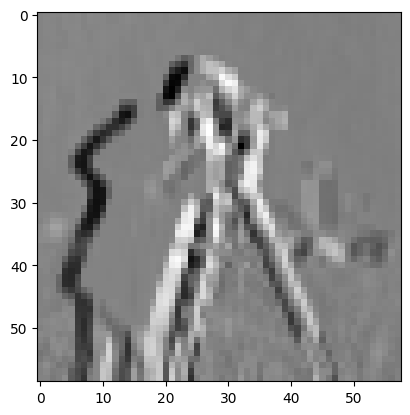

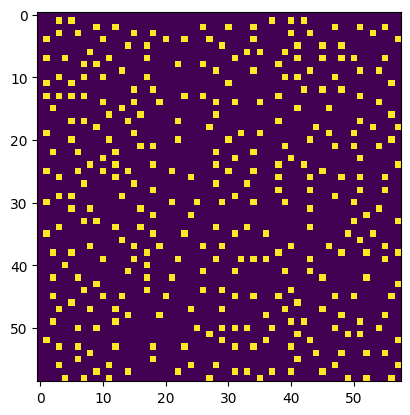

s=0.125 i=2


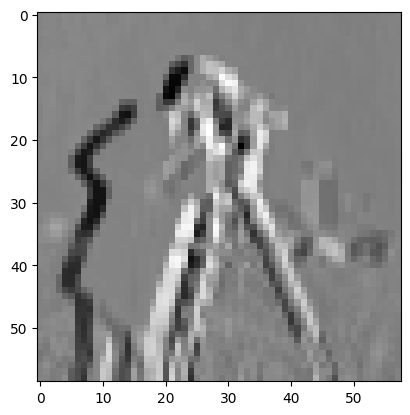

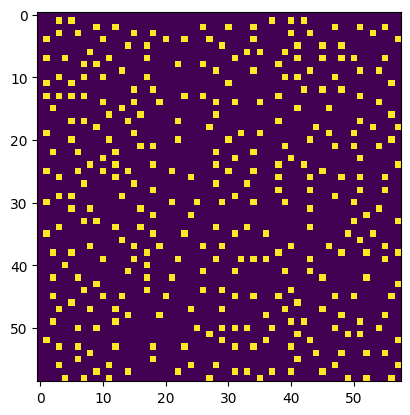

s=0.125 i=3


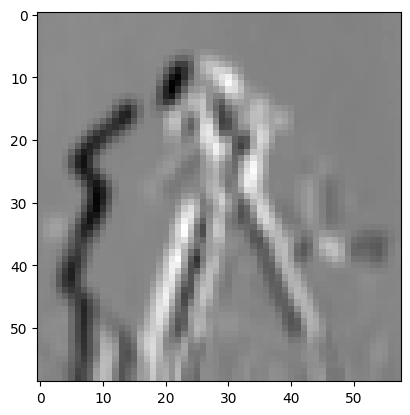

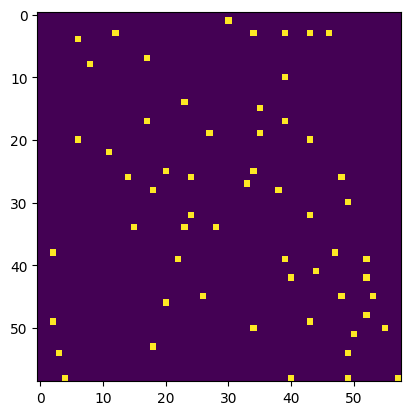

In [4]:
n_blurs = 5
scales = [0.5**n for n in range(4)]
#scales = [1.0]
gauss_pyramid = {}
keypoints = {}

for s in scales:
    img_scaled = scale(img_gray, s)
    for i, sigma in enumerate(sigmas[0]):
        gauss = generate_gaussian_filter(3, 3*sigma)
        if not i: gauss_pyramid[s] = [img_scaled]
        gauss_pyramid[s].append(cv.filter2D(gauss_pyramid[s][i-1], -1, gauss))
    gauss_pyramid[s] = np.diff(gauss_pyramid[s])
    plt.show()
    for i, simgma in enumerate(sigmas):
        if not i: keypoints[s] = []
        if i and i != n_blurs - 1:
            kp = generic_filter(
                    np.array(gauss_pyramid[s][i-1: i+2]), 
                    lambda x: int(np.argmax(x) == 4),
                    size = (3, 3, 3))
            keypoints[s].append(kp[1, :, :])
            print(f"{s=} {i=}")
            plt.imshow(gauss_pyramid[s][i], cmap="gray")
            plt.show()
            plt.imshow(keypoints[s][i-2])
            plt.show()

In [5]:
dogs = sa.create_dogs(scalespace, sa_params)

extremas = sa.find_discrete_extremas(dogs, sa_params, sigmas, deltas)

Extrema Calculation: Octave 0
Extrema Calculation: Octave 1
Extrema Calculation: Octave 2
Extrema Calculation: Octave 3


In [6]:
taylor = sa.taylor_expansion(extremas, scalespace, sa_params, deltas, sigmas)

In [7]:
kps = sa.filter_extremas(taylor, dogs, sa_params)

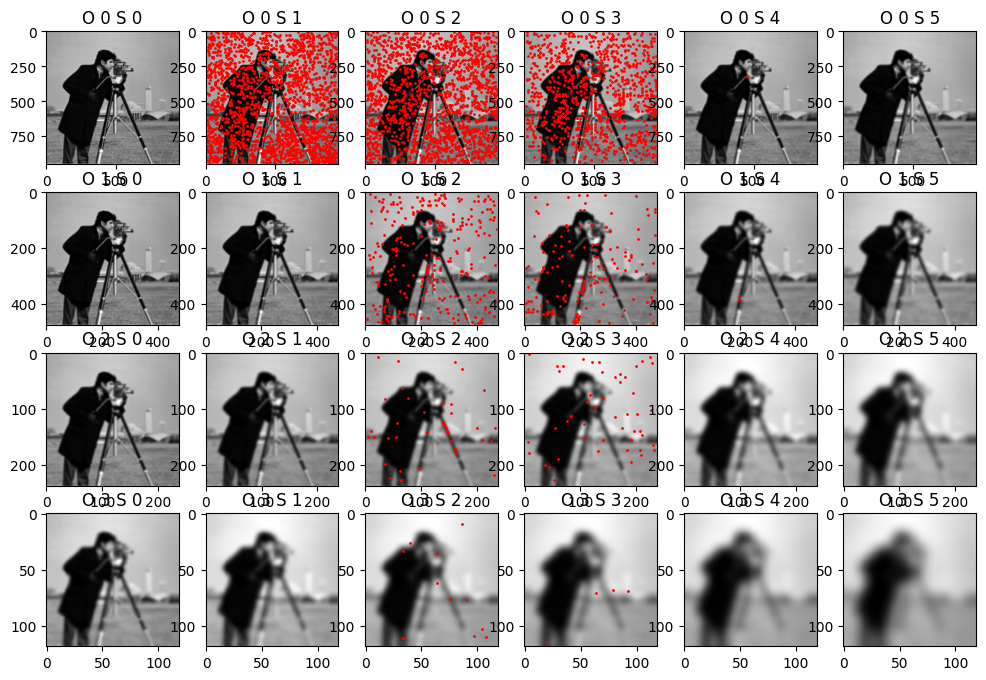

In [8]:
SIFT_Visualization.visualize_keypoints(scalespace, kps, deltas, title="keypoints")